In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import re

#pd.set_option("display.float_format", lambda x: "f" % x)

In [2]:
#Funciones
#Unifica los sectores de manufactura
def unificando_man(x):    
    x = re.sub(r'C10\.\d+.*', 'C10 - Manufacture of food products', x)
    return x
#pasa carácters a mínusculas, quita espacios de mas y reemplaza puntos por nada.
def limpiar_caracteres(x):
    x = x.lower().strip().replace('-','').replace('.','')
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        x = x.replace(a, b)
    return x


In [3]:
data = pd.read_excel('BasedeDatosMundial.xlsx')

In [4]:
data.head()

,Unnamed: 0,312,Name,Country installed,Address,Industry sector NACE code,Solar thermal system owner / operator,Solar thermal engineering company,Process integration engineering company,Year of operation start,...,Initiative,Integration methodology,Crucial Interfaces,Construction/Commissioning,Operation /Performance,Author,Company of author,E-mail,Phone,Homepage
0,1.0,1.0,1 Of Tov Hatching Farm,Israel,Kfar Daniel,C10 - Manufacture of food products,Of Tov,TIGI,TIGI,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,ABB Longmeadow,South Africa,"ABB Distribution Centre in Modderfontein, Gauteng",C28 - Manufacture of machinery and equipment n...,//,Solar Heat Exchangers,Ivan Goldsmith Consulting,2009,...,NaN,NaN,NaN,NaN,NaN,//,Solar Heat Exchangers,info@solarheat.co.za,//,http://www.solarheat.co.za/
2,1.0,1.0,Abbott Healthcare,India,Abbott Healthcare Pvt. Ltd,C21 - Manufacture of basic pharmaceutical prod...,Abbott Healthcare,Forbes Solar,Forbes Solar,2014,...,NaN,NaN,NaN,NaN,NaN,CSH India,CSH India,contact@cshindia.in,//,http://www.cshindia.in
3,1.0,1.0,Achaia Clauss S.A.,Greece,Patra,C11 - Manufacture of beverages,Achaia Clauss S.A.,SOLE S.A.,//,1994,...,NaN,NaN,NaN,NaN,NaN,Miriam Martinez,Sole,miriam@sole.gr,+30 2122229827,http://www.eurostar-solar.com/
4,1.0,1.0,Acme McCrary,United States,"Asheboro, North Carolina",C13 - Manufacture of textiles,FLS Energy (contractor for Acme McCrary),AET Alternate Energy Technologies,//,2012,...,NaN,NaN,NaN,NaN,NaN,Rachel Alexander,FLS Energy,ralexander@flsenergy.com,//,http://www.flsenergy.com/images/casestudies/Ac...


In [5]:
data.columns.tolist()


['Unnamed: 0',
 312,
 'Name',
 'Country installed',
 'Address',
 'Industry sector NACE code',
 'Solar thermal system owner / operator',
 'Solar thermal engineering company',
 'Process integration engineering company',
 'Year of operation start',
 'Collector technology',
 'Collector name',
 'Installed collector area (gross), m²',
 'Installed collector area (aperture), m²',
 'Installed collector area (absorber), m²',
 'Installed thermal power (actual), kWth',
 'Solar collector loop heat transfer fluid',
 'Solar energy storage',
 'Storage volume, m³',
 'Kind of conventional heat source',
 'Kind of fuel used',
 'Solar thermal energy used for',
 'Unit operation',
 'Point of Solar Heat Integration',
 '--> Integration how and where',
 '--> Temperature range process',
 '--> Temperature range solar loop (min/max), C°',
 'Total investment costs (excl. VAT), €',
 'Solar loop (excl. VAT), €',
 'Solar energy storage (excl. VAT), €',
 'Others (excl. VAT), €',
 'Process integration (excl. VAT), €',
 

In [6]:
#Quitando las primeras dos columnas que no aportan información
data = data.drop(['Unnamed: 0',312],axis = 1)
data.head()

,Name,Country installed,Address,Industry sector NACE code,Solar thermal system owner / operator,Solar thermal engineering company,Process integration engineering company,Year of operation start,Collector technology,Collector name,...,Initiative,Integration methodology,Crucial Interfaces,Construction/Commissioning,Operation /Performance,Author,Company of author,E-mail,Phone,Homepage
0,1 Of Tov Hatching Farm,Israel,Kfar Daniel,C10 - Manufacture of food products,Of Tov,TIGI,TIGI,2017,flat plate collector,TIGI HC1.A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABB Longmeadow,South Africa,"ABB Distribution Centre in Modderfontein, Gauteng",C28 - Manufacture of machinery and equipment n...,//,Solar Heat Exchangers,Ivan Goldsmith Consulting,2009,Flat plate collector,//,...,NaN,NaN,NaN,NaN,NaN,//,Solar Heat Exchangers,info@solarheat.co.za,//,http://www.solarheat.co.za/
2,Abbott Healthcare,India,Abbott Healthcare Pvt. Ltd,C21 - Manufacture of basic pharmaceutical prod...,Abbott Healthcare,Forbes Solar,Forbes Solar,2014,Other or various collectors,//,...,NaN,NaN,NaN,NaN,NaN,CSH India,CSH India,contact@cshindia.in,//,http://www.cshindia.in
3,Achaia Clauss S.A.,Greece,Patra,C11 - Manufacture of beverages,Achaia Clauss S.A.,SOLE S.A.,//,1994,flat plate collector,//,...,NaN,NaN,NaN,NaN,NaN,Miriam Martinez,Sole,miriam@sole.gr,+30 2122229827,http://www.eurostar-solar.com/
4,Acme McCrary,United States,"Asheboro, North Carolina",C13 - Manufacture of textiles,FLS Energy (contractor for Acme McCrary),AET Alternate Energy Technologies,//,2012,Flat plate collector,//,...,NaN,NaN,NaN,NaN,NaN,Rachel Alexander,FLS Energy,ralexander@flsenergy.com,//,http://www.flsenergy.com/images/casestudies/Ac...


In [7]:
data.shape

(329, 47)

In [8]:
data.describe().T

,count,unique,top,freq
Name,325,324,Barcel SA de CV,2
Country installed,325,40,México,81
Address,325,302,"SAN MIGUEL TOTOLAPAN, GUERRERO, MEXICO",3
Industry sector NACE code,325,48,C10 - Manufacture of food products,49
Solar thermal system owner / operator,325,259,//,46
Solar thermal engineering company,325,132,Modulo Solar,46
Process integration engineering company,323,119,//,71
Year of operation start,325,30,2012,29
Collector technology,325,20,Flat plate collector,83
Collector name,324,69,//,160


In [9]:
#Remplazando '//' por nan.
data = data.replace('//',np.nan)

In [10]:
#Número de datos nulos por columna
data.isnull().sum()

Name                                                     4
Country installed                                        4
Address                                                  4
Industry sector NACE code                                5
Solar thermal system owner / operator                   50
Solar thermal engineering company                       30
Process integration engineering company                 77
Year of operation start                                 25
Collector technology                                     5
Collector name                                         165
Installed collector area (gross), m²                     5
Installed collector area (aperture), m²                172
Installed collector area (absorber), m²                249
Installed thermal power (actual), kWth                   7
Solar collector loop heat transfer fluid               131
Solar energy storage                                   110
Storage volume, m³                                      

In [11]:
#Filtrando los que tiene más de 200 datos nulos
null_cols = data.isnull().sum()
null_cols[null_cols>200]

Installed collector area (absorber), m²                249
--> Integration how and where                          247
Solar loop (excl. VAT), €                              314
Solar energy storage (excl. VAT), €                    316
Others (excl. VAT), €                                  318
Process integration (excl. VAT), €                     316
Cost for fuel replaced, €/MWhfuel                      312
Annual useful solar heat delivery, MWh/a               262
Specific annual useful solar heat delivery, MWh/am²    262
Solar fraction, %                                      250
Initiative                                             328
Integration methodology                                328
Crucial Interfaces                                     328
Construction/Commissioning                             328
Operation /Performance                                 328
Author                                                 204
Phone                                                  2

In [12]:
#Hacer una lista de columnas que quiero eliminar. No quiero elimina
#la columna de solar fraction, 
drop_cols = list(null_cols[null_cols> 200].index)
drop_cols.remove('Solar fraction, %')
drop_cols 

['Installed collector area (absorber), m²',
 '--> Integration how and where',
 'Solar loop (excl. VAT), €',
 'Solar energy storage (excl. VAT), €',
 'Others (excl. VAT), €',
 'Process integration (excl. VAT), €',
 'Cost for fuel replaced, €/MWhfuel',
 'Annual useful solar heat delivery, MWh/a',
 'Specific annual useful solar heat delivery, MWh/am²',
 'Initiative',
 'Integration methodology',
 'Crucial Interfaces',
 'Construction/Commissioning',
 'Operation /Performance',
 'Author',
 'Phone']

In [13]:
#Elimino las columnas elegidas
data = data.drop(drop_cols, axis = 1)
data.shape

(329, 31)

In [14]:
print(len(data['Country installed'].unique()))
data['Country installed'].unique().tolist()

41


['Israel',
 'South Africa',
 'India',
 'Greece',
 'United States',
 'Spain',
 'México',
 'Germany',
 'Romania',
 'Thailand',
 'Italy',
 'Sweden',
 'France',
 'Ukraine',
 'Austria',
 'China',
 'Czech Republic',
 'Chile',
 'Switzerland',
 'Costa Rica',
 'Morocco',
 'Panama',
 'Egypt',
 'Qatar',
 'Argentina',
 'Vietnam',
 'Cyprus',
 'United Arab Emirates',
 'Jordan',
 'Portugal',
 'Canada',
 'Indonesia',
 'Oman',
 'Kenya',
 'Saudi Arabia',
 'Netherlands',
 'Malaysia',
 'Tunisia',
 'Honduras',
 'Mexico',
 nan]

In [15]:
data['Country installed'] = data['Country installed'].astype(str)
data['Country installed'] = data['Country installed'].apply(limpiar_caracteres)
instalaciones_pais=data['Country installed'].value_counts()
instalaciones_pais.head()

mexico           83
india            47
austria          31
germany          28
united states    19
Name: Country installed, dtype: int64

In [16]:
instalaciones_año = pd.DataFrame(data['Year of operation start'].value_counts()).reset_index()
instalaciones_año = instalaciones_año.sort_values(by='index')
print('Años registrados ', len(instalaciones_año))
print('Numero de instalaciones', instalaciones_año.sum())
instalaciones_año

Años registrados  29
Numero de instalaciones index                      58125.0
Year of operation start      304.0
dtype: float64


,index,Year of operation start
27,1980.0,1
28,1987.0,1
26,1991.0,1
18,1993.0,5
21,1994.0,4
23,1996.0,2
24,1997.0,1
20,1998.0,4
22,1999.0,4
15,2000.0,6


In [17]:
#Buscando columnas que no dan información, es decir de baja varianza
#Se usa nanpercentile para que no se tomen en cuenta los nan como dato.
low_variance = []

for col in data._get_numeric_data():
    minimum = min(data[col])
    ninety_perc= np.nanpercentile(data[col],90)
    if ninety_perc == minimum:
        low_variance.append(col)

In [18]:
#No hay columnas que no aporten información
low_variance

[]

In [19]:
#Verificando la información para identificar datos atípicos
stats = data.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Year of operation start,304.0,2010.151316,6.492707,1980.00,2007.00,2012.0,2015.0000,2019.0
"Installed collector area (gross), m²",324.0,1313.043765,11899.907878,1.00,85.00,196.0,504.5000,210000.0
"Installed collector area (aperture), m²",157.0,423.137898,973.628150,20.00,77.80,168.0,326.7000,7460.0
"Installed thermal power (actual), kWth",322.0,739.621366,5821.515829,0.70,52.50,120.9,282.6250,100000.0
"Storage volume, m³",241.0,101.608382,650.825827,0.00,3.00,8.0,20.0000,7500.0
"Total investment costs (excl. VAT), €",322.0,100523.796335,450402.455833,0.01,1.00,23090.5,90000.0000,7500000.0
"Specific investment costs, €/m²",320.0,3937.068438,56756.545628,0.00,0.01,200.0,369.9775,1000000.0


In [20]:
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
Year of operation start,304.0,2010.151316,6.492707,1980.00,2007.00,2012.0,2015.0000,2019.0,8.0000
"Installed collector area (gross), m²",324.0,1313.043765,11899.907878,1.00,85.00,196.0,504.5000,210000.0,419.5000
"Installed collector area (aperture), m²",157.0,423.137898,973.628150,20.00,77.80,168.0,326.7000,7460.0,248.9000
"Installed thermal power (actual), kWth",322.0,739.621366,5821.515829,0.70,52.50,120.9,282.6250,100000.0,230.1250
"Storage volume, m³",241.0,101.608382,650.825827,0.00,3.00,8.0,20.0000,7500.0,17.0000
"Total investment costs (excl. VAT), €",322.0,100523.796335,450402.455833,0.01,1.00,23090.5,90000.0000,7500000.0,89999.0000
"Specific investment costs, €/m²",320.0,3937.068438,56756.545628,0.00,0.01,200.0,369.9775,1000000.0,369.9675


In [21]:
outliers = pd.DataFrame(columns=data.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = data[(data[col] < lower) |
                   (data[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)

In [22]:
outliers

,Name,Country installed,Address,Industry sector NACE code,Solar thermal system owner / operator,Solar thermal engineering company,Process integration engineering company,Year of operation start,Collector technology,Collector name,...,"--> Temperature range solar loop (min/max), C°","Total investment costs (excl. VAT), €","Subsidy, € or % of total investment costs","Calculated solar thermal system life time, a","Specific investment costs, €/m²","Solar fraction, %",Company of author,E-mail,Homepage,Outlier
3,Achaia Clauss S.A.,greece,Patra,C11 - Manufacture of beverages,Achaia Clauss S.A.,SOLE S.A.,NaN,1994.0,flat plate collector,NaN,...,37 - 51,36036.00,no subsidies,0,117.00,117l/m3,Sole,miriam@sole.gr,http://www.eurostar-solar.com/,Year of operation start
12,Allegro S.A. Children's Cloathing Manufacturer,greece,Athens,C13 - Manufacture of textiles,Allegro S.A. Children's Cloathing Manufacturer,SOLE S.A.,SOLE S.A.,1993.0,flat plate collector,NaN,...,NaN,10400.00,no subsidies,0,148.57,NaN,Sole,miriam@sole.gr,http://www.eurostar-solar.com/,Year of operation start
19,Autolavados Carte S.A.,spain,Huelva,S - Other services activities,Autolavados Carte S.A.,Disol S.A.,Solar del Valle,1994.0,Flat plate collector,NaN,...,NaN,64032.00,No subsidies,0,464.00,NaN,Disol S.A.,info@disol.es,NaN,Year of operation start
50,Carpentry Hamminger,austria,Lohnsburg,C31 - Manufacture of furniture,Möbeltischlerei Hamminger (First Class Holz),Sonnen Energie GmbH,Xsolar Austria,1994.0,flat plate collector,NaN,...,25 - 115,28952.00,no subsidies,0,329.00,NaN,NaN,Wolfgang Glatzl,w.glatzl@aee.at,Year of operation start
102,GICB Wine Cellars,france,"Route du Balcon de Madeloc, 66652 Banyuls",C11 - Manufacture of beverages,GICB Wine Cellars,Tecsol,Tecsol,1991.0,evacuated tube collector,Giordano Cortec 9 tubes 77 capteurs,...,75 - 95,109213.00,20 % national subsidy ADEME ; 17 % regional su...,25,505.62,NaN,NaN,Daniel Mugnier,daniel.mugnier@tecsol.fr,Year of operation start
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Mahindra Vehicle Manufacturers,india,Chakan,"C29 - Manufacture of motor vehicles, trailers ...",Mahindra Vehicle Manufacturers,Clique Solar,Clique Solar,2010.0,Other or various collectors,Arun Dish,...,120°C,245350.82,No subsidy,NaN,1363.06,NaN,CSH India,contact@cshindia.in,http://www.cshindia.in/installedprojects.html,"Specific investment costs, €/m²"
192,Masdar City Solar Field,united arab emirates,Masdar City - Abu Dhabi,"M - Professional, scientific and technical act...",TVP Solar,TVP Solar,TVP Solar,2012.0,Other or various collectors,MT Power v3.11,...,165°C/180°C,92000.00,0,20,2090.91,NaN,TVP Solar,scarpellino@tvpsolar.com,www.tvpsolar.com,"Specific investment costs, €/m²"
199,Mevgal S.A.,greece,Athens,C10 - Manufacture of food products,Mevgal S.A.,Intersolar S.A.,Intersolar S.A.,2000.0,other or various collectors,NaN,...,20 - 90,180296.00,20 % - subsidy through the Operational Program...,0,180296.00,NaN,NaN,Miriam Martinez,miriam@sole.gr,"Specific investment costs, €/m²"
202,Milwaukee Brewing Co.,united states,"Milwaukee, Wisconsin",C11 - Manufacture of beverages,NaN,Caleffi,NaN,2013.0,Flat plate collector,NaN,...,NaN,125172.00,88832,30,1203.58,NaN,SEIA,kstainken@seia.org,NaN,"Specific investment costs, €/m²"


In [23]:
outliers['Outlier'].value_counts()

Installed thermal power (actual), kWth     32
Storage volume, m³                         29
Installed collector area (gross), m²       28
Total investment costs (excl. VAT), €      22
Specific investment costs, €/m²            14
Installed collector area (aperture), m²    13
Year of operation start                    12
Name: Outlier, dtype: int64

In [24]:
data.corr()

,Year of operation start,"Installed collector area (gross), m²","Installed collector area (aperture), m²","Installed thermal power (actual), kWth","Storage volume, m³","Total investment costs (excl. VAT), €","Specific investment costs, €/m²"
Year of operation start,1.000000,0.065004,-0.164917,0.063711,0.066052,0.029818,-0.007986
"Installed collector area (gross), m²",0.065004,1.000000,0.864046,0.995349,0.416319,0.040603,-0.007532
"Installed collector area (aperture), m²",-0.164917,0.864046,1.000000,0.871961,-0.006879,0.559892,0.438754
"Installed thermal power (actual), kWth",0.063711,0.995349,0.871961,1.000000,0.417136,0.062894,-0.008657
"Storage volume, m³",0.066052,0.416319,-0.006879,0.417136,1.000000,0.088232,-0.005745
"Total investment costs (excl. VAT), €",0.029818,0.040603,0.559892,0.062894,0.088232,1.000000,0.112788
"Specific investment costs, €/m²",-0.007986,-0.007532,0.438754,-0.008657,-0.005745,0.112788,1.000000


In [25]:
numericData = data._get_numeric_data()
numericData.columns.tolist()

['Year of operation start',
 'Installed collector area (gross), m²',
 'Installed collector area (aperture), m²',
 'Installed thermal power (actual), kWth',
 'Storage volume, m³',
 'Total investment costs (excl. VAT), €',
 'Specific investment costs, €/m²']

Text(0.5, 1.0, 'Buscando relación')

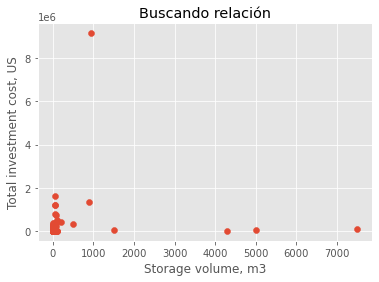

In [26]:

#Quiero hacer una gráfica de los caja para ver los outlier en donde esta arriba o abajo
x = data['Storage volume, m³']
y = data['Total investment costs (excl. VAT), €']*1.22

matplotlib.style.use('ggplot')
plt.scatter(x,y)
#plt. figure(figsize =(25,12))
plt.xlabel('Storage volume, m3')
plt.ylabel('Total investment cost, US')
plt.title('Buscando relación')

In [ ]:
#'Installed collector area (gross), m²',
# 'Installed collector area (aperture), m²',
# 'Installed thermal power (actual), kWth',
# 'Storage volume, m³',
# 'Total investment costs (excl. VAT), €',
# 'Specific investment costs, €/m²']  
x=numericData['Installed collector area (gross), m²']
y=numericData['Installed thermal power (actual), kWth']

#plt.figure(figsize=(25,12))
plt.xlabel('Xlab')
plt.ylabel('Ylab')
plt.ylim(0,210000)
plt.boxplot([x])
plt.show();

In [27]:
data.dtypes

Name                                               object
Country installed                                  object
Address                                            object
Industry sector NACE code                          object
Solar thermal system owner / operator              object
Solar thermal engineering company                  object
Process integration engineering company            object
Year of operation start                           float64
Collector technology                               object
Collector name                                     object
Installed collector area (gross), m²              float64
Installed collector area (aperture), m²           float64
Installed thermal power (actual), kWth            float64
Solar collector loop heat transfer fluid           object
Solar energy storage                               object
Storage volume, m³                                float64
Kind of conventional heat source                   object
Kind of fuel u

In [28]:
data['Year of operation start'] = pd.to_datetime(data['Year of operation start'], format='%Y')
data['Year of operation start']

0     2017-01-01
1     2009-01-01
2     2014-01-01
3     1994-01-01
4     2012-01-01
         ...    
324   2012-01-01
325          NaT
326          NaT
327          NaT
328          NaT
Name: Year of operation start, Length: 329, dtype: datetime64[ns]

In [29]:
data['Industry sector NACE code'].unique()

array(['C10 - Manufacture of food products',
       'C28 - Manufacture of machinery and equipment n.e.c.',
       'C21 - Manufacture of basic pharmaceutical products and pharmaceutical preparations',
       'C11 - Manufacture of beverages', 'C13 - Manufacture of textiles',
       'A - Agriculture, forestry and fishing',
       'C10.1 - Processing and preserving of meat and production of meat products',
       'C10.9 - Manufacture of prepared animal feeds',
       'C25 - Manufacture of fabricated metal products, except machinery and equipment',
       'C10.5 - Manufacture of dairy products',
       'B - Mining and quarrying', 'S - Other services activities',
       'C15 - Manufacture of leather and related products',
       'C17 - Manufacture of paper and paper products',
       'C20 - Manufacture of chemicals and chemical products',
       'C27 - Manufacture of electrical equipment',
       'C29 - Manufacture of motor vehicles, trailers and semi-trailers',
       'C26 - Manufacture of 

In [30]:
data = data.replace('C-21 - Manufacture of basic pharmaceutical productos and pharmaceutical preparatins','C21 - Manufacture of basic pharmaceutical products and pharmaceutical preparations')
len(data['Industry sector NACE code'].unique())

47

In [31]:
data['Industry sector NACE code'] = data['Industry sector NACE code'].astype(str)

In [32]:
data['Industry sector NACE code_2'] = data['Industry sector NACE code'].apply(lambda x: re.sub(r'C10\.\d+.*', 'C10 - Manufacture of food products', x))
print(len(data['Industry sector NACE code_2'].unique()))
data['Industry sector NACE code_2'].value_counts()

38


C10 - Manufacture of food products                                                                                                       116
C11 - Manufacture of beverages                                                                                                            33
B - Mining and quarrying                                                                                                                  14
S - Other services activities                                                                                                             14
C13 - Manufacture of textiles                                                                                                             13
A - Agriculture, forestry and fishing                                                                                                     12
C21 - Manufacture of basic pharmaceutical products and pharmaceutical preparations                                                        11
C28 - Manufac

In [ ]:
data.columns


In [33]:
#Cambiano los nombres de las columnas
data.columns = ['Name', 'Country', 'Address', 'Sector',
       'Owner_operator',
       'Solar thermal engineering company',
       'Integrator company', 'Year',
       'Collector technology', 'Collector name',
       'Gross area',
       'Total aperture area',
       'Thermal power',
       'heat transfer fluid', 'Energy storage',
       'Storage volume', 'Conventional heat source',
       'Fuel used', 'Use', 'Unit operation',
       'Point of integration', 'Temperature range process',
       'Temperature range solar loop (min/max)',
       'Total investment costs',
       'Subsidy',
       'System life time',
       'Specific investment costs', 'Solar fraction',
       'Contact', 'E-mail', 'Homepage',
       'Sector grouped']

In [34]:
len(data['Solar thermal engineering company'].unique())
#Transformando los datos para poder unificar y comparar
data['Solar thermal engineering company'].unique()
data['Solar thermal engineering company'] = data['Solar thermal engineering company'].astype(str)

data['Solar thermal engineering company'] = data['Solar thermal engineering company'].apply(limpiar_caracteres)
stecompany = data['Solar thermal engineering company'].unique()
len(stecompany)
stecompany = pd.DataFrame(stecompany, columns= ['Solar thermal engineering company'])
stecompany = stecompany.sort_values('Solar thermal engineering company').reset_index(drop=True)
stecompany = stecompany['Solar thermal engineering company'].apply(lambda x: re.sub(r'industrial solar.*', 'industrial solar gmbh',x))
#stecompany = stecompany['Solar thermal engineering company'].apply(lambda x: re.sub(r'inter\s?solar.*', 'intersolar',x))
stecompany.unique()

array(['abengoa solar', 'absolicion', 'aee intec', 'aee intec, sunmark',
       'aet alternate energy technologies', 'arconsunmark',
       'aschoff solar', 'aspiration energy', 'ate enterprises',
       'bergen solar power & energy ltd', 'bps solar', 'caleffi',
       'citrus jmk sa de cv', 'clique solar', 'clique solar pvt ltd',
       'cspf solar', 'disol sa', 'e3 energy', 'ecoscop trier',
       'el nasr pharamaceutical chemicals', 'elcoklöckner', 'energyweb',
       'fafco',
       'fls energy (collectors from aet alternate energy technologies)',
       'foco sa', 'forbes solar', 'fsave solartechnik gmbh',
       'gadhia solar energy systems', 'garol', 'gasokol gmbh', 'genergy',
       'glasspoint', 'grammer solar gmbh', 'greenera energy',
       'greenonetec solaindustrie gmbh', 'hbc group',
       'himin solar co ltd', 'industrial solar gmbh',
       'instalaciones tecnicas extremeñas sl / solar collector manufacturer: tsc sl',
       'inter solar', 'intersolar india', 'intersol

In [35]:
#Transformando los datos para poder unificar y comparar
data['Integrator company'] = data['Integrator company'].astype(str)
data['Integrator company'] = data['Integrator company'].apply(limpiar_caracteres)
intcompany = data['Integrator company'].unique()
intcompany = pd.DataFrame(intcompany, columns= ['Integrator company'])
intcompany = intcompany.sort_values('Integrator company').reset_index(drop=True)
intcompany = intcompany['Integrator company'].apply(lambda x: re.sub(r'industrial solar.*', 'industrial solar gmbh',x))
#stecompany = stecompany['Solar thermal engineering company'].apply(lambda x: re.sub(r'inter\s?solar.*', 'intersolar',x))
intcompany.unique()

array(['abengoa solar', 'aee intec', 'aiguasol', 'aschoff solar',
       'aspiration energy', 'ate enterprises', 'atsi',
       'bergen solar power & energy ltd', 'boyas bros', 'bps solar',
       'brewery radoy', 'citrus jmk sa de cv', 'clique solar',
       'clique solar pvt ltd', 'cremo sa', 'd jaquier sàrl',
       'delegated by customer', 'delegated by customer (axima suez)',
       'disol sa', 'dlr', 'e3 energy, aee intec', 'ecoscop trier',
       'energyweb', 'fin  future is now', 'fls energy', 'forbes solar',
       'fraunhofer institute for solar energy',
       'gadhia solar energy systems', 'gartner',
       'gdw asselbergs installation', 'genergy',
       'genkinger wasser wärme gmbh', 'glass point', 'greenera energy',
       'greenonetec solaindustrie gmbh', 'grundfoss',
       'haustechnik schapka gmbh', 'hbc group',
       'heinz zoller (planner / engineer)',
       'heinz zoller (planning engineer)', 'htraussnigg gmbh',
       'industrial solar gmbh', 'inegi', 'ing aign

In [36]:
data['Integrator company'].unique()

array(['tigi', 'ivan goldsmith consulting', 'forbes solar', 'nan',
       'isofoton sa', 'inventive power sapi de cv', 'ate enterprises',
       'dlr', 'sole sa', 'sunny sa', 'rsv engineers', 'solar del valle',
       'aschoff solar', 'clique solar pvt ltd',
       'taylormade solar solutions pvt ltd', 'modulo solar',
       'industrial solar gmbh (formerly pse ag)',
       'bergen solar power & energy ltd', 'hbc group', 'tecsol',
       'heinz zoller (planner / engineer)',
       'heinz zoller (planning engineer)', 'brewery radoy',
       'ecoscop trier', 'xsolar austria', 'solarwall®',
       'e3 energy, aee intec', 'energyweb', 'aee intec',
       'thermax limited', 'genkinger wasser wärme gmbh', 'mri',
       'ritter xl solar', 'rackam', 'cremo sa',
       'shenzhen quir solar technology', 'priogo ag',
       'lotus solar technologies, fichtner solar gmbh', 'd jaquier sàrl',
       'delegated by customer', 'abengoa solar', 'ing aigner',
       'supreme rays solar system', 'universi

In [ ]:
data.head()

In [37]:
data['Collector technology'].unique()

array(['flat plate collector', 'Flat plate collector',
       'Other or various collectors', 'Parabolic trough collector',
       'parabolic trough collector', 'Air collector', 'air collector',
       'Evacuated tube collector', 'fresnel collector',
       'evacuated tube collector', 'other or various collectors',
       'Parabolic trough collector ', 'Unglazed Collector', nan,
       'Evacuated Tube Collector', 'Fresnel Collector',
       'Unglazed collector', 'Parabolic Trough Collector',
       'Various Collector', 'Fresnel collector'], dtype=object)

In [38]:
data['Collector technology'] = data['Collector technology'].astype(str)
data['Collector technology'] = data['Collector technology'].apply(limpiar_caracteres)

In [59]:
tecnology = pd.DataFrame(data['Collector technology'].unique().tolist(), columns=['Technolgies'])
tecnology

,Technolgies
0,flat plate collector
1,various collector
2,parabolic trough collector
3,air collector
4,evacuated tube collector
5,fresnel collector
6,unglazed collector
7,nan


In [40]:
data['Collector technology'] = data['Collector technology'].replace('other or various collectors','various collector')

In [42]:
data['Collector technology'].unique().tolist()

['flat plate collector',
 'various collector',
 'parabolic trough collector',
 'air collector',
 'evacuated tube collector',
 'fresnel collector',
 'unglazed collector',
 'nan']

In [43]:
data['Gross area'].unique()
data['Thermal power'].unique()

array([2.1240e+02, 1.0080e+02, 1.3020e+02, 2.1560e+02, 5.2010e+02,
       9.2120e+02, 2.0790e+02, 1.1285e+02, 1.7500e+02, 1.2600e+02,
       7.5600e+01, 1.7985e+02, 4.9000e+01, 5.1800e+02, 1.6100e+02,
       3.7800e+02, 5.6000e+01, 9.6600e+01, 1.3230e+03, 2.2400e+02,
       1.1200e+02, 7.7900e+01, 1.2000e+02, 5.7400e+01, 2.1000e+01,
       3.7100e+01, 7.4000e+01, 1.4000e+01, 1.4000e+02, 1.5050e+01,
       2.7300e+02, 3.1670e+01, 4.0000e+01, 4.5500e+01, 1.0500e+03,
       5.2000e+01, 1.9600e+01, 1.9750e+01, 1.5120e+02, 3.6000e+01,
       1.1800e+02, 6.9000e+01, 5.0000e+01, 1.2250e+02, 2.2200e+01,
       6.1600e+01, 2.1000e+02, 1.3679e+02, 1.2355e+02, 8.4000e+01,
       9.4500e+01, 3.9000e+01, 6.6010e+02, 2.8350e+02, 2.5200e+01,
       1.6800e+01, 6.9650e+02, 2.7510e+04, 1.7500e+01, 4.9900e+01,
       9.6000e+01, 1.6590e+02, 2.0254e+02, 1.0481e+02, 6.0200e+02,
       6.1000e+01, 3.3000e+02, 9.0000e+03, 7.7000e+01, 9.4600e+01,
       7.0000e-01, 6.3000e+02, 9.2400e+01,        nan, 3.0800e

In [44]:
data['Use'] = data['Use'].astype(str).apply(limpiar_caracteres)

In [45]:
data['Use'].unique()
#len(data['Use'].unique())

array(['washing', 'nan',
       'hot water generated from dishes is fed to boiler which produces steam for preparing drugs',
       'bottle washing in winery', 'hot water for textile drying process',
       'heating water for a fish farm', 'boiler preheating',
       'steam cooking', 'pelletized of birds',
       'production of saturated steam', 'water heating',
       'hot water for the washing machines of children cloathing',
       'hot water preheating in steam boiler',
       'hot water for cleaning equipment, and prheating of boiler feed water',
       'drying of pulse', 'usage is primarily for ablution facility',
       'drying of medicinal plants',
       'prehating of boiler feed water used for washing of cisterns and cars',
       'solar heat for retanningprocess', 'pasteurization of milk',
       'for different process applications in the paper mill',
       'vegetal oil heating', 'preheat of steam production',
       'brewing processes', 'preheat of hot water',
       'preh

data.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
ruta = "dataCleaned.csv"
data.to_csv(ruta)

In [ ]:
energy_instaled =(
    data
        .groupby("Country")
        .count()
).sort_values(by = 'Name', ascending=False)
energy_instaled

In [50]:
data.columns.tolist()

['Name',
 'Country',
 'Address',
 'Sector',
 'Owner_operator',
 'Solar thermal engineering company',
 'Integrator company',
 'Year',
 'Collector technology',
 'Collector name',
 'Gross area',
 'Total aperture area',
 'Thermal power',
 'heat transfer fluid',
 'Energy storage',
 'Storage volume',
 'Conventional heat source',
 'Fuel used',
 'Use',
 'Unit operation',
 'Point of integration',
 'Temperature range process',
 'Temperature range solar loop (min/max)',
 'Total investment costs',
 'Subsidy',
 'System life time',
 'Specific investment costs',
 'Solar fraction',
 'Contact',
 'E-mail',
 'Homepage',
 'Sector grouped']

In [53]:
ruta_2 = "mexico.csv"

mexico = data[data['Country']=='mexico']
mexico.to_csv(ruta_2)

In [ ]:
data['Country installed'] = data['Country installed'].astype(str)
data['Country installed'] = data['Country installed'].apply(limpiar_caracteres)
instalaciones_pais=data['Country installed'].value_counts()
instalaciones_pais.head()

In [64]:
sum_pais = (
    data
        .groupby('Country')
        .sum()
)
energia_pais = sum_pais[['Gross area','Thermal power']].sort_values('Thermal power',ascending = False)
energia_pais.head()

,Gross area,Thermal power
Country,,
oman,210000.00,100000.00
china,47244.70,29696.29
chile,39740.00,27818.00
united states,24144.40,16860.58
mexico,25205.68,14927.36
